# Anime Rating Analysis

## Context

Content on the movie portal is rated by the viewers. The movie portal also provides other information for each anime like the duration, number of people who have watched it,etc.

We want to identify the most important factors involved in rating an anime. You objective is to identify the important factors that influence a rating and building a predictive model to predict the rating on an anime.


## Objective

To analyze the data and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating an anime?
2. Can we build a good predictive model for rating an anime? What needs to be part of the performance assessment for the model?


## Data Information



**Data Dictionary**

- title - the title of anime
- description - the synopsis of the plot
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode in minutes
- ongoing - whether it is ongoing
- sznOfRelease - the season of release (Winter, Spring, Fall)
- years_running - number of years the anime ran/is running
- studio_primary - primary studio of production
- studios_colab - whether there was a collaboration between studios to produce the anime
- contentWarn - whether anime has a content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating
- tag_Based_on_a_Manga - whether the anime is based on a manga
- tag_Comedy - whether the anime is of Comedy genre
- tag_Action - whether the anime is of Action genre
- tag_Fantasy - whether the anime is of Fantasy genre
- tag_Sci_Fi - whether the anime is of Sci-Fi genre
- tag_Shounen - whether the anime has a tag Shounen
- tag_Original_Work - whether the anime is an original work
- tag_Non_Human_Protagonists - whether the anime has any non-human protagonists
- tag_Drama - whether the anime is of Drama genre
- tag_Adventure - whether the anime is of Adventure genre
- tag_Family_Friendly - whether the anime is family-friendly
- tag_Short_Episodes - whether the anime has short episodes
- tag_School_Life - whether the anime is regarding school life
- tag_Romance - whether the anime is of Romance genre
- tag_Shorts - whether the anime has a tag Shorts
- tag_Slice_of_Life - whether the anime has a tag Slice of Life
- tag_Seinen - whether the anime has a tag Seinen
- tag_Supernatural - whether the anime has a tag Supernatural
- tag_Magic - whether the anime has a tag Magic
- tag_Animal_Protagonists - whether the anime has animal protagonists
- tag_Ecchi - whether the anime has a tag Ecchi
- tag_Mecha - whether the anime has a tag Mecha
- tag_Based_on_a_Light_Novel - whether the anime is based on a light novel
- tag_CG_Animation - whether the anime has a tag CG Animation
- tag_Superpowers - whether the anime has a tag Superpowers
- tag_Others - whether the anime has other tags
- tag_is_missing - whether tag is missing or not

### Import necessary libraries

In [1]:
#!pip install nb_black

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [3]:
# loading the dataset
df = pd.read_csv("anime_data.csv")

<IPython.core.display.Javascript object>

In [4]:
# checking shape of the data
df.shape

(12101, 44)

<IPython.core.display.Javascript object>

In [5]:
# to view first 5 rows of the dataset
df.head(5)

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,14351,25810,2656,4.702,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,1453,21733,124,4.663,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,946,17148,132,4.661,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,2183,8082,167,4.660,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,3217,7864,174,4.650,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [6]:
# to view last 5 rows of the dataset
df.tail(5)

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,rating,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Princess Vanilla is a princess in a land of ic...,Movie,1,NaN,False,is_missing,0,TMS Entertainment,0,0,22.0,1,29,1,2.807,10,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12097,Hulaing Babies Petit,NaN,TV,12,5.0,False,Winter,0,Others,0,0,13.0,10,77,2,2.090,10,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12098,Marco & The Galaxy Dragon,NaN,OVA,1,NaN,False,is_missing,0,is_missing,0,0,17.0,0,65,0,2.543,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12099,Xing Chen Bian 2nd Season,Second season of Xing Chen Bian.,Web,3,24.0,True,is_missing,0,is_missing,0,0,40.5,31,22,0,3.941,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,NaN,Movie,1,20.0,False,is_missing,0,Shin-Ei Animation,0,0,15.0,1,19,1,2.925,10,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [7]:
# let's create a copy of the data to avoid any changes to original data
df2 = df.copy()

<IPython.core.display.Javascript object>

## Data preprocessing 

In [8]:
# checking for duplicate values in the data
df2.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

In [9]:
# checking the names of the columns in the data
pd.DataFrame(df2.columns, columns=['Column Names'])


,Column Names
0,title
1,description
2,mediaType
3,eps
4,duration
5,ongoing
6,sznOfRelease
7,years_running
8,studio_primary
9,studios_colab


<IPython.core.display.Javascript object>

In [10]:
# checking column datatypes and number of non-null values
df2.info(), df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

(None,
 title                         12101
 description                    7633
 mediaType                     12101
 eps                           12101
 duration                       7465
 ongoing                       12101
 sznOfRelease                  12101
 years_running                 12101
 studio_primary                12101
 studios_colab                 12101
 contentWarn                   12101
 watched                       12101
 watching                      12101
 wantWatch                     12101
 dropped                       12101
 rating                        12101
 votes                         12101
 tag_Based_on_a_Manga          12101
 tag_Comedy                    12101
 tag_Action                    12101
 tag_Fantasy                   12101
 tag_Sci_Fi                    12101
 tag_Shounen                   12101
 tag_Original_Work             12101
 tag_Non_Human_Protagonists    12101
 tag_Drama                     12101
 tag_Adventure                 

<IPython.core.display.Javascript object>

**Data Types**
- The Title, Description, MediaType, Stuio_primary is an object datatype
- The ongoing series is a Bool data type 
- Raiting, watched and duration is a Float64 data type. 
- All Tags of the data is an int data type. 

**Null Values**
- The description and duration columns have nulls where:
    Description = 4468 nulls,
    Duration = 4636 nulls 

### Let's check for missing values in the data.

In [11]:
# checking for missing values in the data
NullVal = df2.isna().sum()
_ = [print(f"{name} {val}") for name, val in NullVal.items() if val > 0]

description 4468
duration 4636


<IPython.core.display.Javascript object>

In [12]:
NullVal

title                            0
description                   4468
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

<IPython.core.display.Javascript object>


**The description and duration columns have missing values or null values.**

In [13]:
# Let's look at the statistical summary of the data
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


<IPython.core.display.Javascript object>

### Results 
**Count:**
All variables have a count of 12101,  indicating that there are no missing values in any of the variables.

**Mean:**
For example, the mean value of the variable eps is approximately 13.39, suggesting that the average number of episodes for the dataset is around 13.39.

**Standard Deviation:**
For instance, the standard deviation of the variable duration is approximately 31.47, indicating the spread or deviation or dispersion of values around the mean.

**Minimum and Maximum:**
These values represent the smallest and largest observed values for each variable. For example, the minimum value of eps is 1, and the maximum value is 2527.

**25th(Lower Quartile) ,50th (median), and 75th Percentiles (Upper Quartile):**
These percentiles divide the data into three equal parts. For instance, the 25th percentile of watched is 55, the median is 341, and the 75th percentile is 2026.

**Let's look at the non-numeric columns.**

In [14]:
# filtering non-numeric columns
cat_columns = df2.select_dtypes(exclude=np.number).columns
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

<IPython.core.display.Javascript object>

In [15]:
# we will skip the title and description columns as they will have a lot of unique values
cat_col = ["mediaType", "ongoing", "sznOfRelease", "studio_primary"]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df2[column].value_counts())
    print("-" * 50)

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
is_missing       63
Name: mediaType, dtype: int64
--------------------------------------------------
False    11986
True       115
Name: ongoing, dtype: int64
--------------------------------------------------
is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: sznOfRelease, dtype: int64
--------------------------------------------------
Others                  4340
is_missing              3208
Toei Animation           636
Sunrise                  430
J.C. Staff               341
MADHOUSE                 337
TMS Entertainment        317
Production I.G           271
Studio Deen              260
Studio Pierrot           221
OLM                      210
A-1 Pictures             194
AIC                      167
Shin-Ei Animation        164
Nippon Animation         145
Tatsunoko Produc

<IPython.core.display.Javascript object>

Describe the results of the previous operation
- The output provided results of most occurances and least occurances of data in each column that was specified 

**medeiaType**
- The most common media types include TV (3993 occurrences), Movie (1928 occurrences), and OVA (1770 occurrences).
- Less common types such as Music Video, Web, DVD Special, and TV Special are also present.
- Additionally, there are 63 occurrences where the media type is missing.

**ongoing:**
- The majority of entries (11986 occurrences) indicate that the media is not ongoing(False). However, there are some entries (115 occurrences) where the media is labeled as ongoing(True).

**sznOfRelease:**
- A large portion of the data (8554 occurrences) lacks information about the season of release ('is_missing'). Among the specified seasons, Spring (1135 occurrences) is the most common, followed by Fall, Winter, and Summer.

**studio_primary:**

- The primary studio responsible for production is labeled as 'Others' in 4340 occurrences.
- There are 3208 occurrences where the studio information is missing ('is_missing'). Among the specified studios, Toei Animation (636 occurrences) and Sunrise (430 occurrences) are the most common.

In [16]:
df2.dtypes

title                          object
description                    object
mediaType                      object
eps                             int64
duration                      float64
ongoing                          bool
sznOfRelease                   object
years_running                   int64
studio_primary                 object
studios_colab                   int64
contentWarn                     int64
watched                       float64
watching                        int64
wantWatch                       int64
dropped                         int64
rating                        float64
votes                           int64
tag_Based_on_a_Manga            int64
tag_Comedy                      int64
tag_Action                      int64
tag_Fantasy                     int64
tag_Sci_Fi                      int64
tag_Shounen                     int64
tag_Original_Work               int64
tag_Non_Human_Protagonists      int64
tag_Drama                       int64
tag_Adventur

<IPython.core.display.Javascript object>

In [17]:
df2.shape

(12101, 44)

<IPython.core.display.Javascript object>

df2.dropna(inplace=True)
df2.shape

## Data Visualization

### Univariate Analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df2, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    df2: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df2, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df2, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df2[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df2[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [19]:
# function to create labeled barplots


def labeled_barplot(df2, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df2[feature])  # length of the column
    count = df2[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df2,
        x=feature,
        palette="Paired",
        order=df2[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

# Histograms and boxplots of the various columns

## Numeric 

In [20]:
columns_notag = [col for col in df2.columns if not col.startswith("tag_")]

# Creating a new DataFrame containing only columns without tags
columnList = df2[columns_notag]

# Display the data types of the new DataFrame
print(columnList.dtypes)

title              object
description        object
mediaType          object
eps                 int64
duration          float64
ongoing              bool
sznOfRelease       object
years_running       int64
studio_primary     object
studios_colab       int64
contentWarn         int64
watched           float64
watching            int64
wantWatch           int64
dropped             int64
rating            float64
votes               int64
dtype: object


<IPython.core.display.Javascript object>

### Raiting

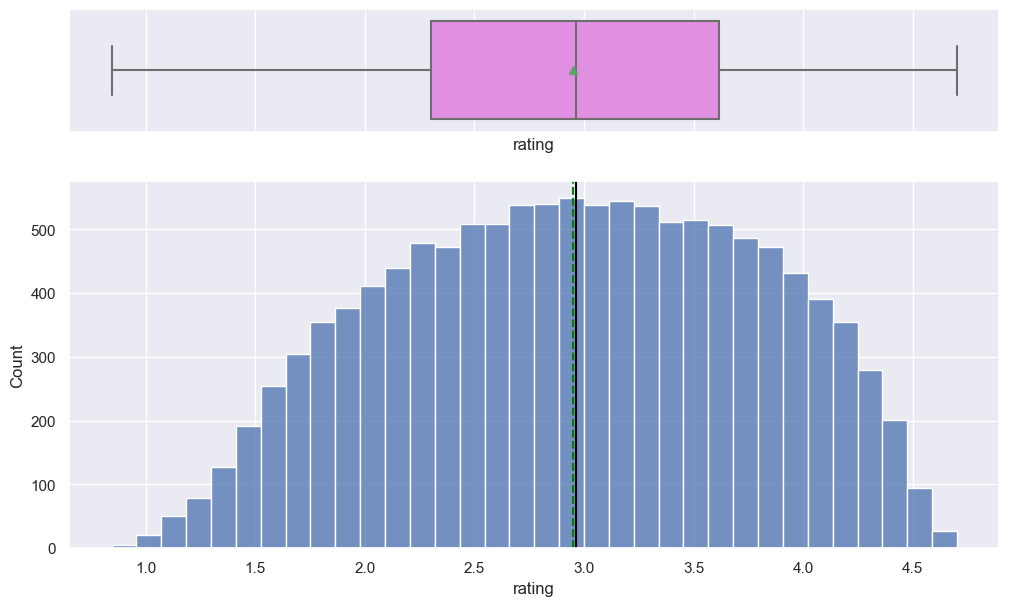

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df2, "rating")

- This distribution is slightly distributed normally with an almost identical mean and median just above 3. It looks to have a slight skew to the left 

### Votes

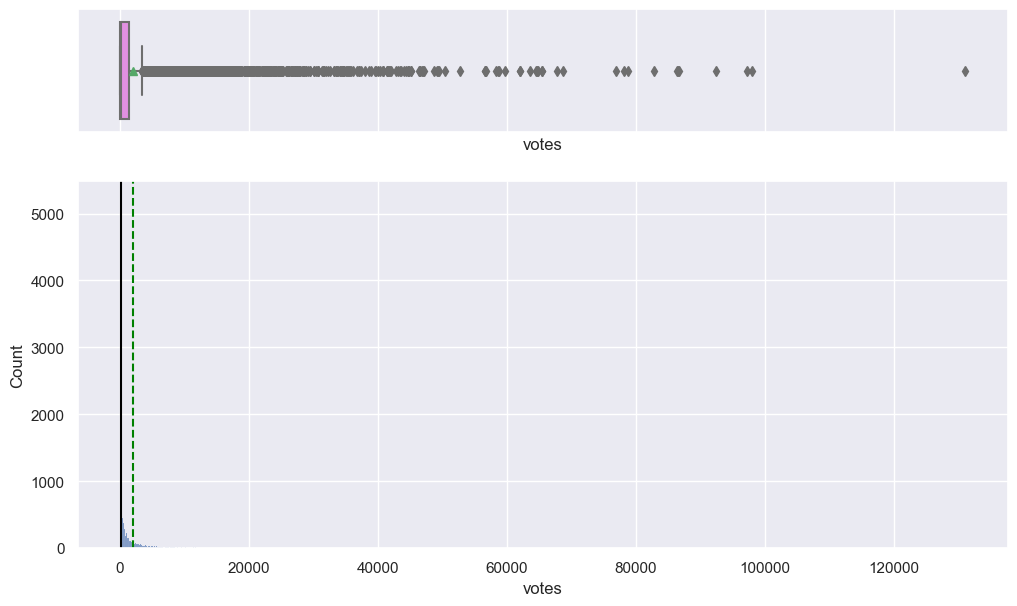

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df2, "votes")

- skewed to the right whcih makes and has multiple outliers that are above the upper bound. 

### Dropped

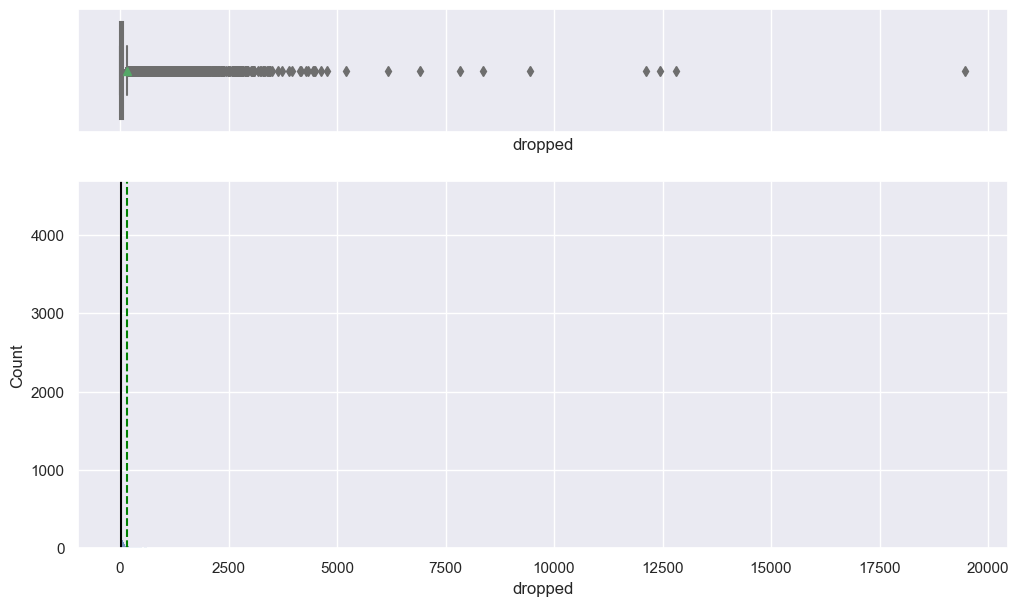

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df2, "dropped")

- Im presuming that this column should  a big effect on rating as it provides data that if the anime was not enjoyable. 
- Both Mean and Median close to zero and assumng to be below 100 based on graph

### wantWatch

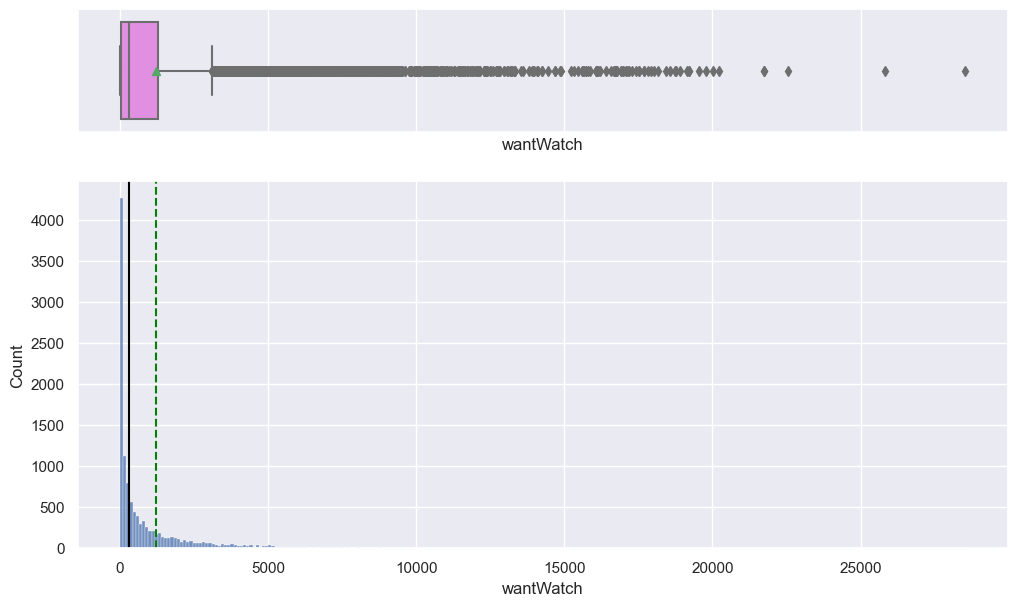

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df2, "wantWatch")

- wantWatch  would mean a user placing the anime in their watchlist and the values close to zero would probably indicate anime that are unpopular in this data set.

### watching

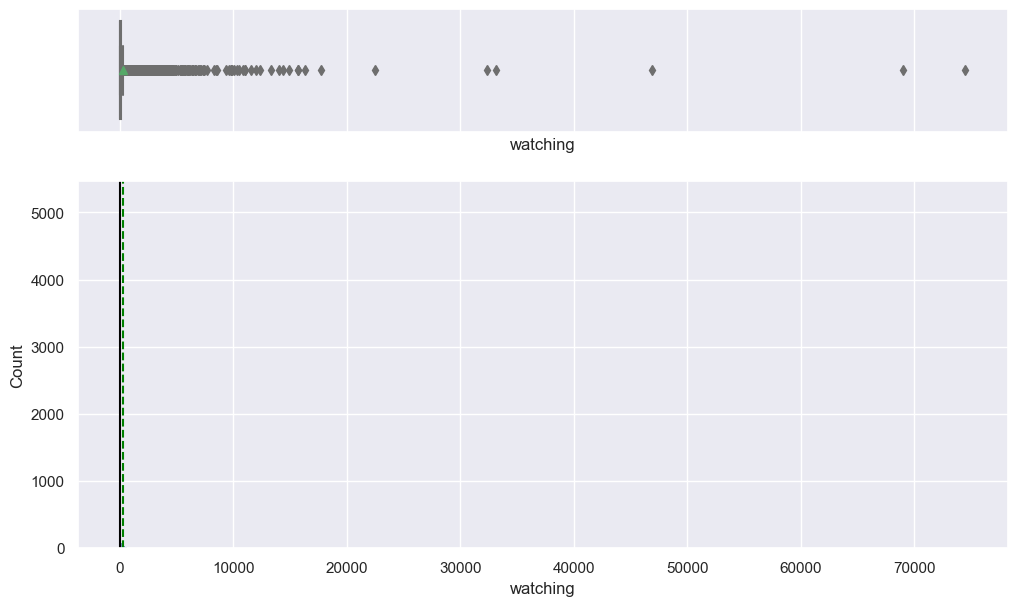

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df2, "watching")

In [26]:
df2["watching"].describe()

count    12101.000000
mean       256.334435
std       1380.840902
min          0.000000
25%          2.000000
50%         14.000000
75%        100.000000
max      74537.000000
Name: watching, dtype: float64

<IPython.core.display.Javascript object>

Large spread of outliers with it being the highest at 74537. median being 14 is astonishing but makes logical sense as to most of these anime would be not very popular.

### watched

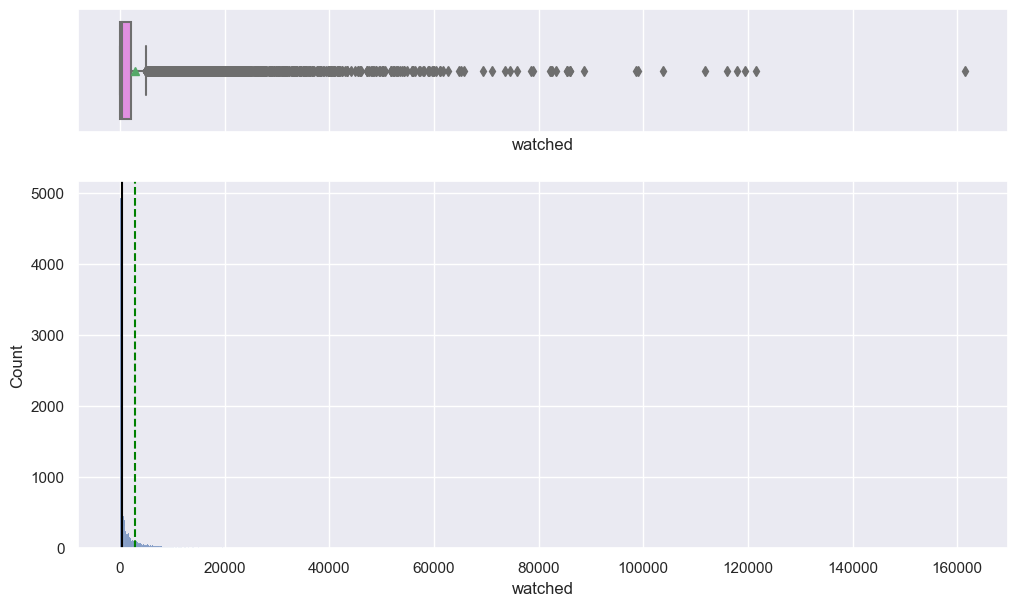

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df2, "watched")

In [28]:
df["watched"].describe()

count     12101.000000
mean       2862.605694
std        7724.347024
min           0.000000
25%          55.000000
50%         341.000000
75%        2026.000000
max      161567.000000
Name: watched, dtype: float64

<IPython.core.display.Javascript object>

- large amounts of outliers and large spread of the data overall. Outliers are above the upper bound which would indicate how much they are largely watched. Mean is 2863, and the Median is a 341 which is pretty low. 

### eps

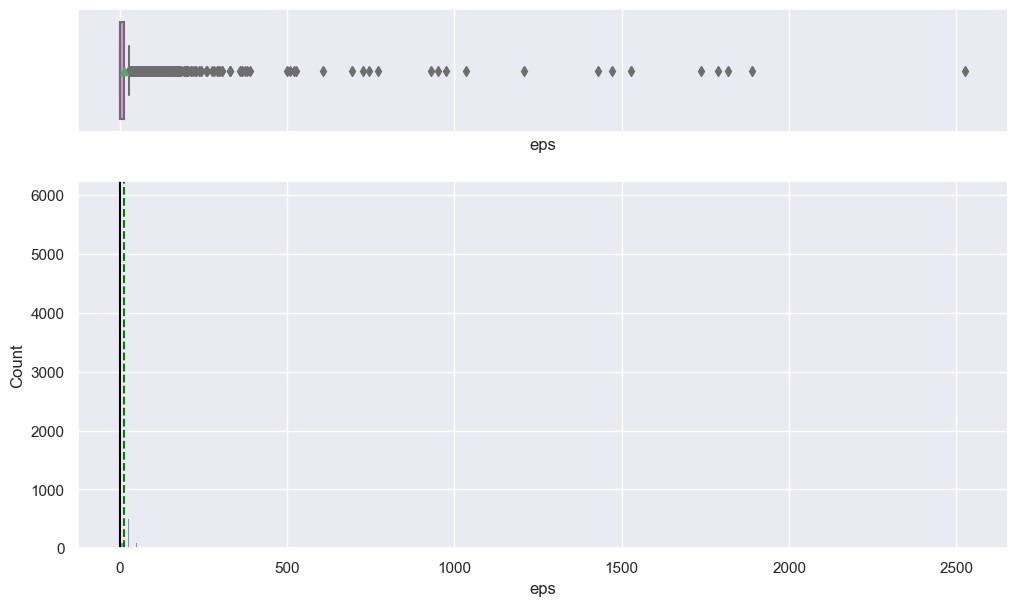

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df2, "eps")

In [30]:
df["eps"].describe()

count    12101.000000
mean        13.393356
std         57.925097
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       2527.000000
Name: eps, dtype: float64

<IPython.core.display.Javascript object>

- Large spread and large numbers of outliers. When comparing it with the mediaTypes, there are mostly movies so I am assuming that there are only certain tv shows with this large amount of episodes creating such a large spread. 

### Duration 

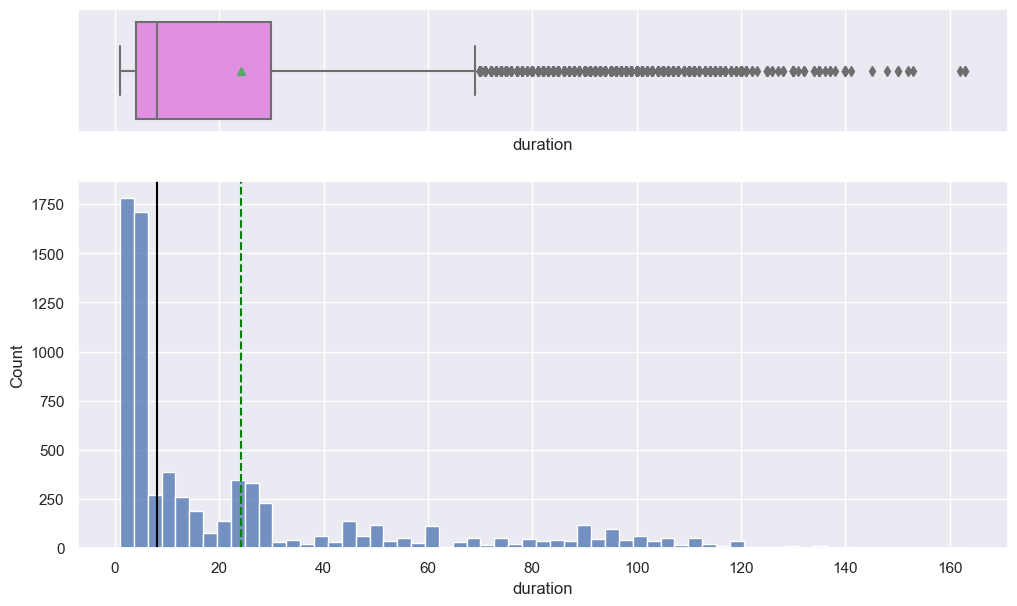

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df2, "duration")

- Duration has a large sum of outliers, as data is mostly consisting of movies which would explain the skewness to the right 
- the count would probably be moslty of short version of videos from youtube(shorts) and then a very few amount from streaming platforms.

### years_running

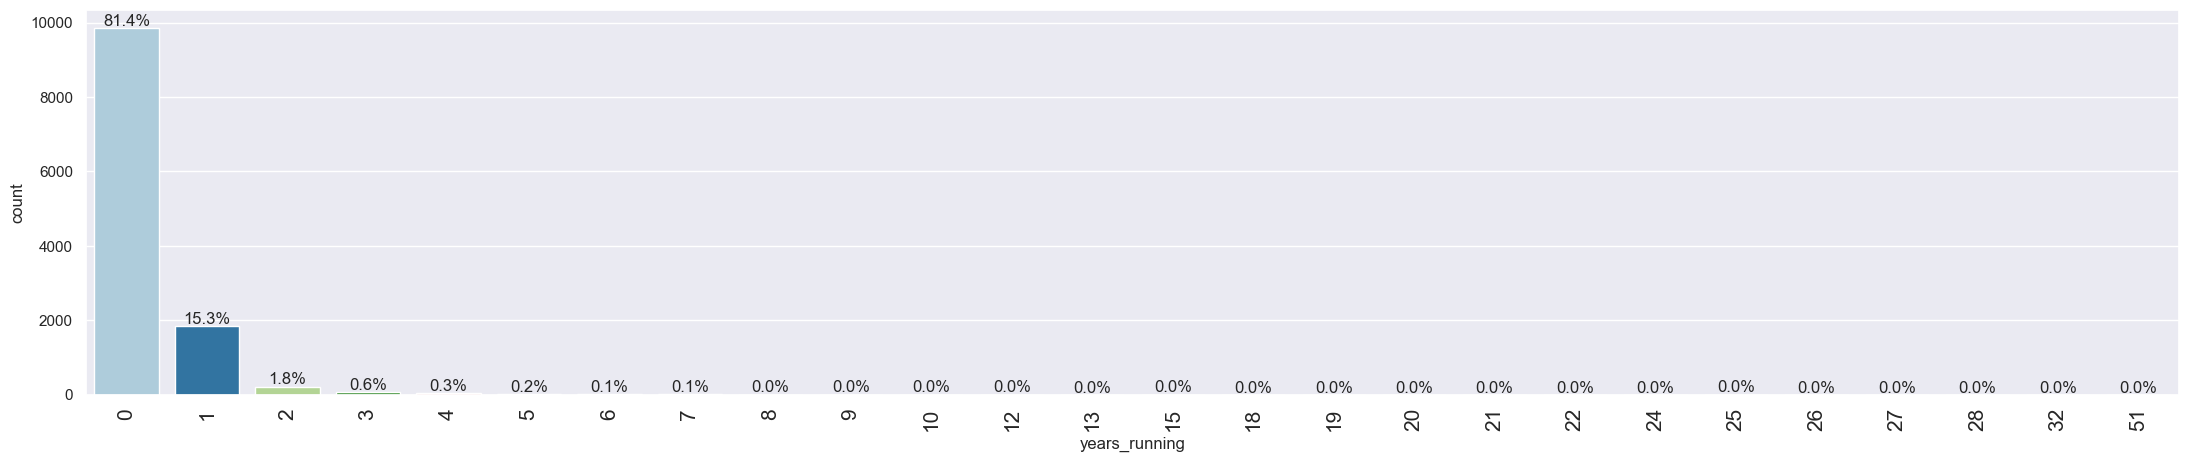

(None, None)

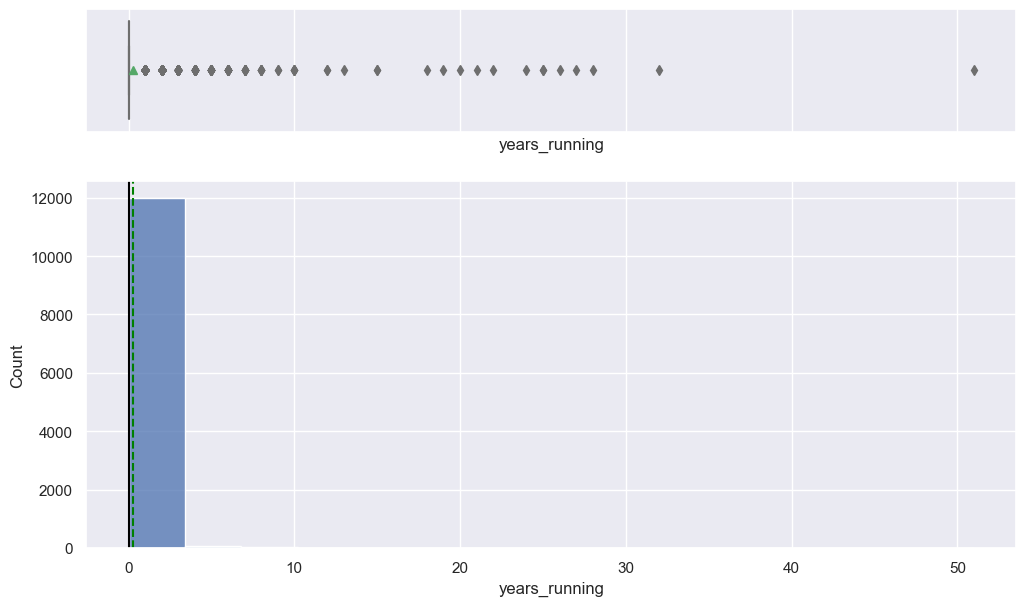

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df2, "years_running", perc=True), histogram_boxplot(
    df2, "years_running"
)

In [33]:
df2["years_running"].unique()

array([ 1,  0,  3,  2,  9,  6, 21,  4, 10,  7,  5,  8, 24, 13, 15, 28, 22,
       27, 25, 12, 26, 32, 51, 18, 19, 20], dtype=int64)

<IPython.core.display.Javascript object>

In [34]:
df2["years_running"].describe()

count    12101.000000
mean         0.283200
std          1.152234
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         51.000000
Name: years_running, dtype: float64

<IPython.core.display.Javascript object>

- The largest anime production has been running for a max 51 years, and rest running less than 40 years. Majority are running for 10 years when looking at the box plot. 

## Categorical data 

In [35]:
columnList.dtypes

title              object
description        object
mediaType          object
eps                 int64
duration          float64
ongoing              bool
sznOfRelease       object
years_running       int64
studio_primary     object
studios_colab       int64
contentWarn         int64
watched           float64
watching            int64
wantWatch           int64
dropped             int64
rating            float64
votes               int64
dtype: object

<IPython.core.display.Javascript object>

### mediaType

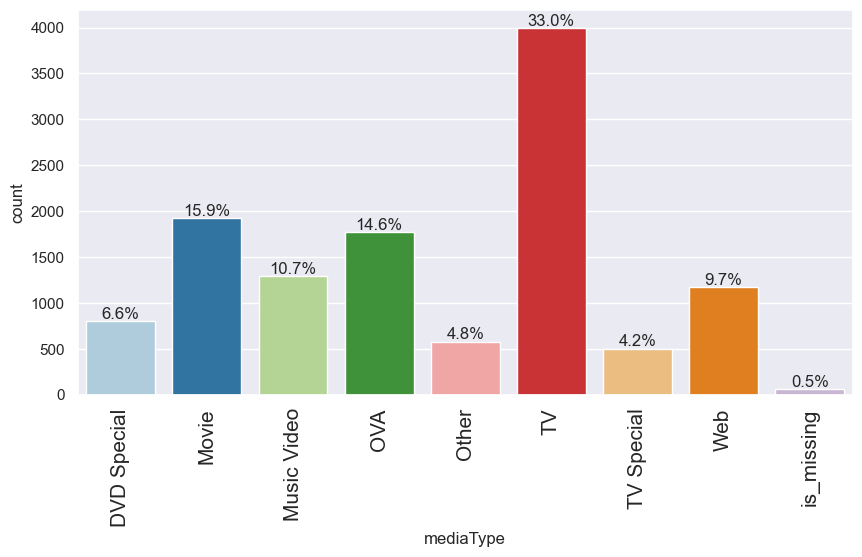

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df2, "mediaType", perc=True)

- The barplot shows that the highest amount of mediType is' Movie', and least is 'is_missing'. Since the data 'is_missing' is only a 0.4% of the total mediaType it can be considered to put in 'Other'

### sznOfRelease

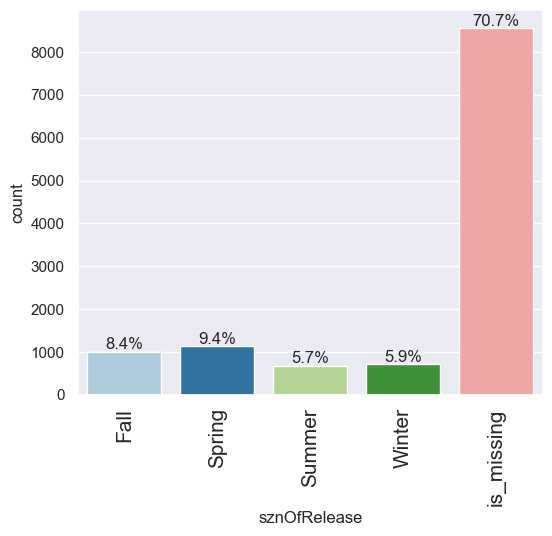

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df2, "sznOfRelease", perc=True)

most of the anime that are under is_missing would indicate how likely less popular anime that come under that category can be. Most renouned anime studios would relase their episodes during the other 4 seasons.

## Binary data

### contentWarn

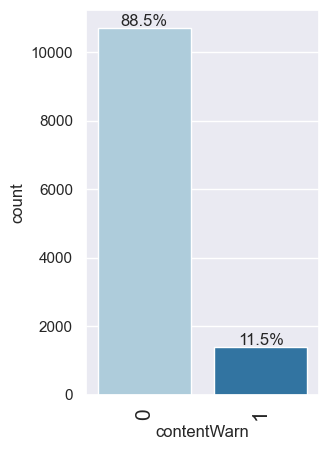

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df2, "contentWarn", perc=True)

- the barplot is providing data that there are very few animes that have content warnings. 

### studios_colab

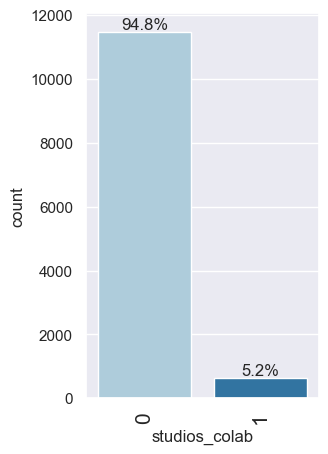

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df2, "studios_colab", perc=True)

- Most of the anime that is released is done solo by each studio based on the data.

In [40]:
# creating a list of tag columns
tag_cols = [item for item in df2.columns if "tag" in item]

# printing the number of occurrences of each unique value in each categorical column
for column in tag_cols:
    print(df2[column].value_counts())
    print("-" * 50)

0    8582
1    3519
Name: tag_Based_on_a_Manga, dtype: int64
--------------------------------------------------
0    8799
1    3302
Name: tag_Comedy, dtype: int64
--------------------------------------------------
0    9303
1    2798
Name: tag_Action, dtype: int64
--------------------------------------------------
0    9904
1    2197
Name: tag_Fantasy, dtype: int64
--------------------------------------------------
0    10089
1     2012
Name: tag_Sci_Fi, dtype: int64
--------------------------------------------------
0    10348
1     1753
Name: tag_Shounen, dtype: int64
--------------------------------------------------
0    10465
1     1636
Name: tag_Original_Work, dtype: int64
--------------------------------------------------
0    10740
1     1361
Name: tag_Non_Human_Protagonists, dtype: int64
--------------------------------------------------
0    10817
1     1284
Name: tag_Drama, dtype: int64
--------------------------------------------------
0    10845
1     1256
Name: tag_Advent

<IPython.core.display.Javascript object>

**Results**

- The provided data summarizes the count of occurrences for each being True (1) and False (0) statement across multiple categories within their respective columns.

### Bivariate analysis

**We will not analyze the *tag* columns for correlation check as they have only 0 or 1 values.**

In [41]:
# creating a list of non-tag columns
corr_cols = [item for item in df2.columns if "tag" not in item]
print(corr_cols)

['title', 'description', 'mediaType', 'eps', 'duration', 'ongoing', 'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']


<IPython.core.display.Javascript object>

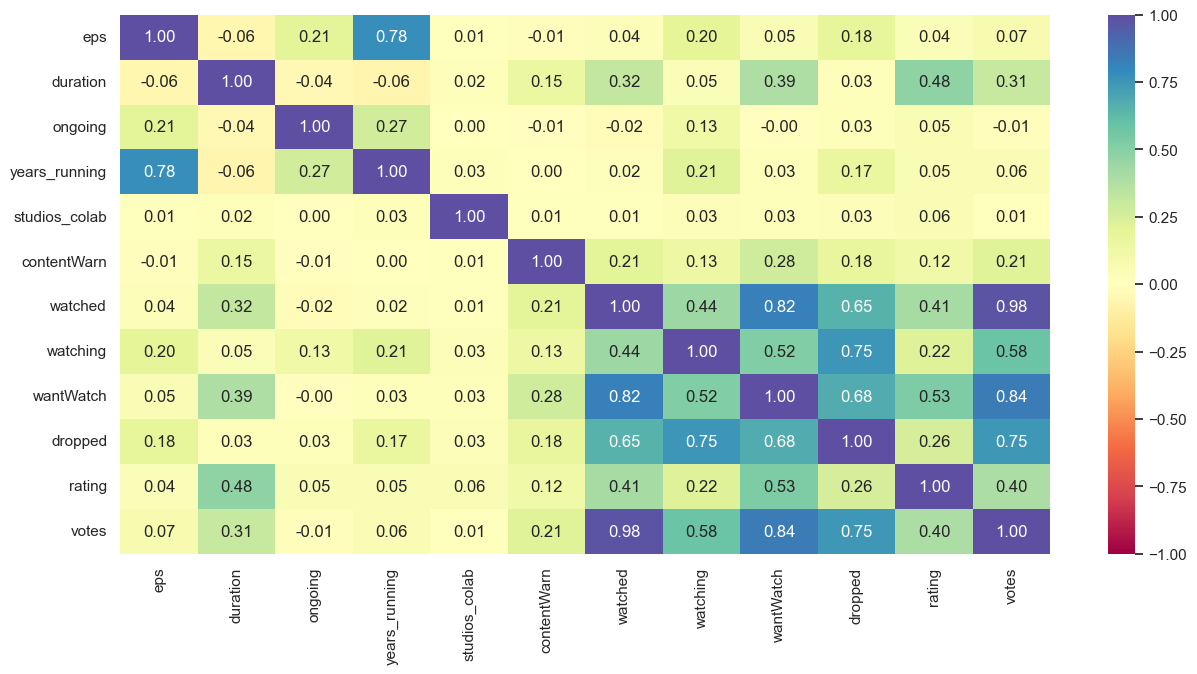

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There is  a slight multicollinearity problem with some of the inputs being votes and watched,watching and dropped, watch and wantwatch. It makes sense logically as how they are related to eachother. 

### Check the variation of the dependent variable `rating` with some of the categorical columns in our data

### `mediaType` vs `rating`

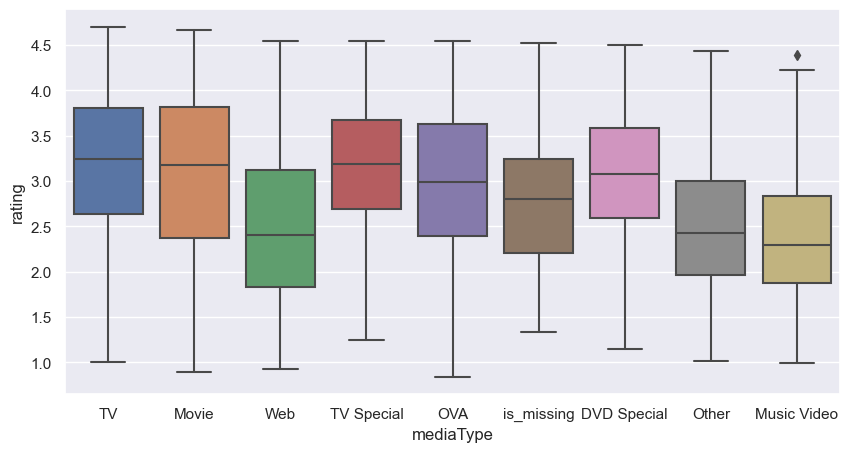

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="rating", data=df2)
plt.show()

- TV seems to have the highest rated IQR. Web, Other, and Music Video seem to have the lowest, indicating how well it did not work.

### `sznOfRelease` vs `rating`

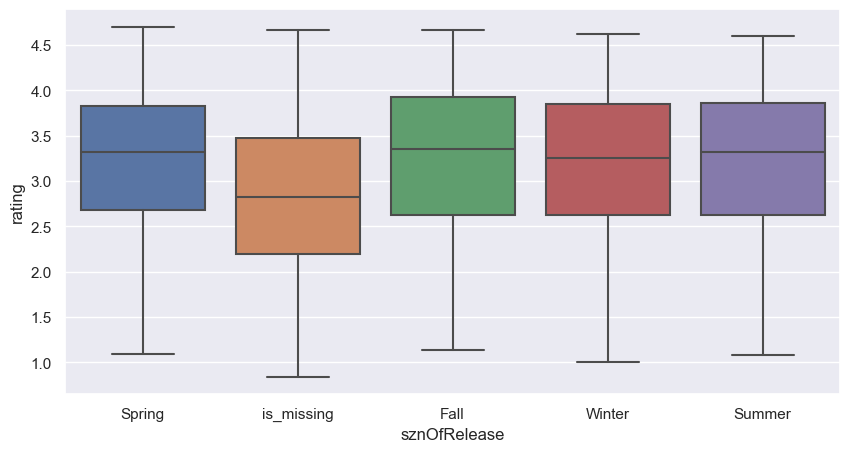

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="sznOfRelease", y="rating", data=df2)
plt.show()

- is_missing has the lowest raiting overall with its max rating being at 3.5 and with the other anime that is released during the season have the higher raitins. 

### `votes` vs `rating`

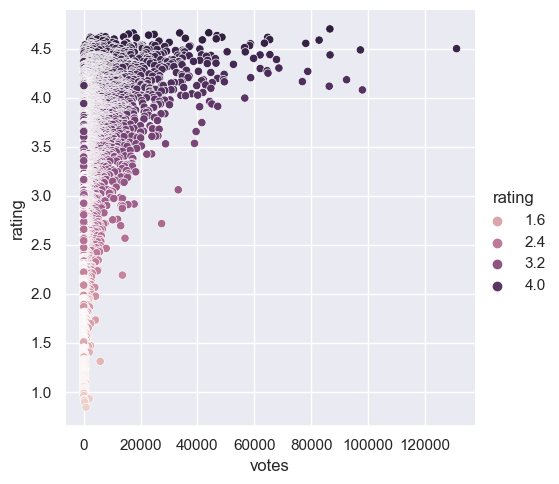

<IPython.core.display.Javascript object>

In [45]:
sns.relplot(data=df, x="votes", y="rating", hue="rating")

- There is high correlation as it makes sence.The more the vots for watching the higher the rating would be 

### `wantWatch` vs `rating`

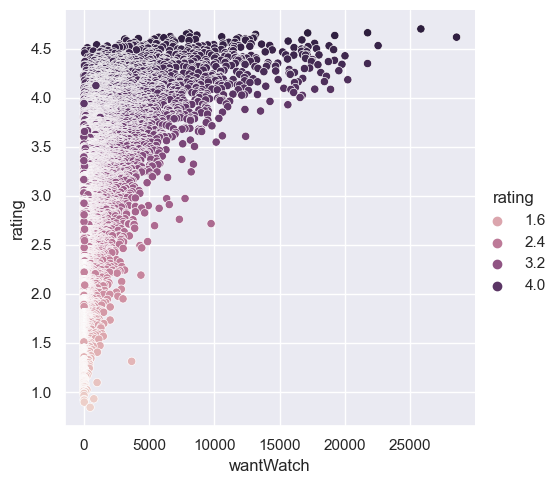

<IPython.core.display.Javascript object>

In [46]:
sns.relplot(data=df, x="wantWatch", y="rating", hue="rating")

- There is high corelation with wantwatch and ratin

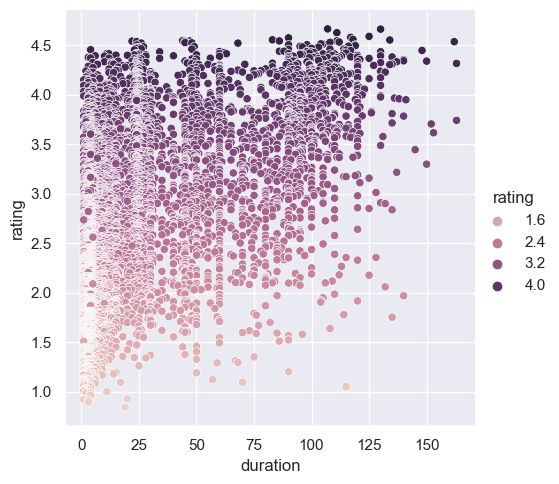

<IPython.core.display.Javascript object>

In [47]:
sns.relplot(data=df, x="duration", y="rating", hue="rating")

- There is high corelation with duration but due to high value of TV, it would deveiate the results of the model.

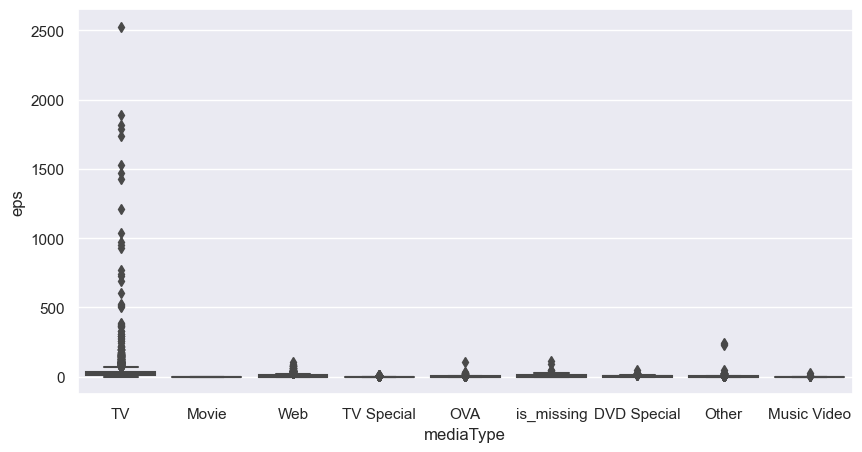

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="eps", data=df2)
plt.show()

- As mentioned when lookning at the univariate analysis of eps, there is mostly TV episodes that is the highest in number.

In [49]:
columnList.dtypes

title              object
description        object
mediaType          object
eps                 int64
duration          float64
ongoing              bool
sznOfRelease       object
years_running       int64
studio_primary     object
studios_colab       int64
contentWarn         int64
watched           float64
watching            int64
wantWatch           int64
dropped             int64
rating            float64
votes               int64
dtype: object

<IPython.core.display.Javascript object>

### <a id='link1'>Summary of EDA</a>

**Data Description:**

When doing the univariate analysis for all columns numeric, there was a trend where outliers went long past the upper bounds. This trend made logical sense as some of the animes in the data set are more popular than others, thus creating larger spreads. 
Most of these animes were also movies which also went above the outliers when considering the duration of the episodes. I think that all data is very valuable but it would be wise to drop such outliers that would create bias within the models therfore dropping a few columns should increase the models goodness of fit if possible. 


**Observations from EDA:**

There was high corelation within the multivariate analysis within the dataset against rating. As mentioned Votes, wantWatch has a high corelation with rating. There is also a trend where the sznOfRelase also depicts how the rating of shows are, while is_missing could indicate that they are sent at random times of the year or does not have a specific timeframe of releasing episodes, it was the only part that had more lower ratings overall.

When looking at the bivariate analysis, there is less collinearity, overall but certain columns have a moderate collinearity against eachother such as dropped and watching, these have a 75% collinearity, indicating that some of the data are not independant of eachother. 

# Feature Engineering

In [50]:
columnList.dtypes

title              object
description        object
mediaType          object
eps                 int64
duration          float64
ongoing              bool
sznOfRelease       object
years_running       int64
studio_primary     object
studios_colab       int64
contentWarn         int64
watched           float64
watching            int64
wantWatch           int64
dropped             int64
rating            float64
votes               int64
dtype: object

<IPython.core.display.Javascript object>

In [51]:
data = df2.copy()

<IPython.core.display.Javascript object>

 ## **Dropping colums** 

### ongoing

In [52]:
# dropping it as it hinders with the model as it provides a worse goodness of fit(R^2 adjusted)
df2.drop(["ongoing"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

dropping it as it hinders with the model, providing a worse goodness of fit(R^2 adjusted)

### title

In [53]:
# dropping title as it serves no purpose and would hinder with the data
df2 = df2.drop("title", axis=1)

<IPython.core.display.Javascript object>

### description

In [54]:
# dropping description as it serves very little purpose on how rating is predicted.
df2 = df2.drop("description", axis=1)

<IPython.core.display.Javascript object>

### duration

In [55]:
# What to do with the null values?
# Have decided to drop it overall.
df2 = df2.drop("duration", axis=1)

<IPython.core.display.Javascript object>

- high corelation with duration but due to high value of TV, it would deveiate the results of the model. Therefore dropping the table.

## Encoding

### mediaType

In [56]:
# converting data into flag variables( float64/int64).
# replacing 'is_missing' values as 'others'
df2["mediaType"].unique()

array(['TV', 'Movie', 'Web', 'TV Special', 'OVA', 'is_missing',
       'DVD Special', 'Other', 'Music Video'], dtype=object)

<IPython.core.display.Javascript object>

In [57]:
df2["mediaType"].value_counts()

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
is_missing       63
Name: mediaType, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
df2["mediaType"] = df2["mediaType"].replace("is_missing", "Other")

<IPython.core.display.Javascript object>

In [59]:
df2["mediaType"].value_counts()

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           643
TV Special      504
Name: mediaType, dtype: int64

<IPython.core.display.Javascript object>

In [60]:
# encoding the data for model building
from sklearn.preprocessing import OrdinalEncoder

# Print 'before_mediaT' column before encoding
before_mediaT = df2["mediaType"]
print("Before encoding:")
print("media_type before")
print(before_mediaT)

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'mediaType' column
df2["mediaType"] = encoder.fit_transform(df2[["mediaType"]])

# Print 'mediaType' column after encoding
print("\nAfter encoding:")
print((before_mediaT, df2[["mediaType"]]))


Before encoding:
media_type before
0           TV
1        Movie
2        Movie
3           TV
4           TV
         ...  
12096    Movie
12097       TV
12098      OVA
12099      Web
12100    Movie
Name: mediaType, Length: 12101, dtype: object

After encoding:
(0           TV
1        Movie
2        Movie
3           TV
4           TV
         ...  
12096    Movie
12097       TV
12098      OVA
12099      Web
12100    Movie
Name: mediaType, Length: 12101, dtype: object,        mediaType
0            5.0
1            1.0
2            1.0
3            5.0
4            5.0
...          ...
12096        1.0
12097        5.0
12098        3.0
12099        7.0
12100        1.0

[12101 rows x 1 columns])


<IPython.core.display.Javascript object>

In [61]:
before_mediaT.unique()

array(['TV', 'Movie', 'Web', 'TV Special', 'OVA', 'Other', 'DVD Special',
       'Music Video'], dtype=object)

<IPython.core.display.Javascript object>

In [62]:
df2["mediaType"].unique()

array([5., 1., 7., 6., 3., 4., 0., 2.])

<IPython.core.display.Javascript object>

Converted the data into numerical for model to work. 

    TV = 5, 
    movie = 1,  
    Web = 7, 
    TV Special = 6, 
    OVA =3, 
    Other = 4, 
    DVD special = 0,  
    Music Video = 2

### sznOfRelease

In [63]:
df2["sznOfRelease"].unique()

array(['Spring', 'is_missing', 'Fall', 'Winter', 'Summer'], dtype=object)

<IPython.core.display.Javascript object>

In [64]:
# Replace the values is_missing as Other
df2["studio_primary"] = df2["studio_primary"].replace("is_missing", "Other")

<IPython.core.display.Javascript object>

In [65]:
# encoding the data for model building
sznOfRelase_before = df2["sznOfRelease"]
print("Before encoding:")
print(sznOfRelase_before)

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'sznOfRelease' column
df2["sznOfRelease"] = encoder.fit_transform(df2[["sznOfRelease"]])


# Print 'sznOfRelease' column after encoding
print("\nAfter encoding:")
print(sznOfRelase_before, df2[["sznOfRelease"]])

Before encoding:
0            Spring
1        is_missing
2        is_missing
3              Fall
4            Spring
            ...    
12096    is_missing
12097        Winter
12098    is_missing
12099    is_missing
12100    is_missing
Name: sznOfRelease, Length: 12101, dtype: object

After encoding:
0            Spring
1        is_missing
2        is_missing
3              Fall
4            Spring
            ...    
12096    is_missing
12097        Winter
12098    is_missing
12099    is_missing
12100    is_missing
Name: sznOfRelease, Length: 12101, dtype: object        sznOfRelease
0               1.0
1               4.0
2               4.0
3               0.0
4               1.0
...             ...
12096           4.0
12097           3.0
12098           4.0
12099           4.0
12100           4.0

[12101 rows x 1 columns]


<IPython.core.display.Javascript object>

In [66]:
df["sznOfRelease"].value_counts()

is_missing    8554
Spring        1135
Fall          1011
Winter         717
Summer         684
Name: sznOfRelease, dtype: int64

<IPython.core.display.Javascript object>

- Replacing is_missing with Other as the data is still valuable.

### studio_primary

In [67]:
df2["studio_primary"].unique()

array(['Bones', 'Others', 'Kyoto Animation', 'Production I.G', 'MADHOUSE',
       'Sunrise', 'A-1 Pictures', 'Shaft', 'Other', 'Studio Deen',
       'J.C. Staff', 'TMS Entertainment', 'Studio Pierrot',
       'Toei Animation', 'Tatsunoko Production', 'AIC',
       'Nippon Animation', 'Shin-Ei Animation', 'GONZO', 'OLM', 'XEBEC',
       'DLE'], dtype=object)

<IPython.core.display.Javascript object>

In [68]:
# Replace the values is_missing as Other
df2["studio_primary"] = df2["studio_primary"].replace("is_missing", "Others")

<IPython.core.display.Javascript object>

In [69]:
from sklearn.preprocessing import OrdinalEncoder

# encoding the data for model building
studio_before = df2["studio_primary"]
print("Before encoding:")
print(studio_before)

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the 'sznOfRelease' column
df2["studio_primary"] = encoder.fit_transform(df2[["studio_primary"]])


# Print 'sznOfRelease' column after encoding
print("\nAfter encoding:")
print(studio_before, df2[["studio_primary"]])

Before encoding:
0                    Bones
1                   Others
2          Kyoto Animation
3           Production I.G
4                   Others
               ...        
12096    TMS Entertainment
12097               Others
12098                Other
12099                Other
12100    Shin-Ei Animation
Name: studio_primary, Length: 12101, dtype: object

After encoding:
0                    Bones
1                   Others
2          Kyoto Animation
3           Production I.G
4                   Others
               ...        
12096    TMS Entertainment
12097               Others
12098                Other
12099                Other
12100    Shin-Ei Animation
Name: studio_primary, Length: 12101, dtype: object        studio_primary
0                 2.0
1                11.0
2                 6.0
3                12.0
4                11.0
...               ...
12096            18.0
12097            11.0
12098            10.0
12099            10.0
12100            14.0

[1210

<IPython.core.display.Javascript object>

This data would affect the prediction of rating if it was removed. 

## Model Building

In [70]:
columnList.dtypes

title              object
description        object
mediaType          object
eps                 int64
duration          float64
ongoing              bool
sznOfRelease       object
years_running       int64
studio_primary     object
studios_colab       int64
contentWarn         int64
watched           float64
watching            int64
wantWatch           int64
dropped             int64
rating            float64
votes               int64
dtype: object

<IPython.core.display.Javascript object>

### Define independent and dependent variables

In [71]:
X = df2.drop(["rating"], axis=1)
y = df2["rating"]

<IPython.core.display.Javascript object>

In [72]:
X.head()

,mediaType,eps,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,watching,wantWatch,dropped,votes,tag_Based_on_a_Manga,tag_Comedy,tag_Action,tag_Fantasy,tag_Sci_Fi,tag_Shounen,tag_Original_Work,tag_Non_Human_Protagonists,tag_Drama,tag_Adventure,tag_Family_Friendly,tag_Short_Episodes,tag_School_Life,tag_Romance,tag_Shorts,tag_Slice_of_Life,tag_Seinen,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,5.0,64,1.0,1,2.0,0,1,103707.0,14351,25810,2656,86547,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1,4.0,0,11.0,0,0,58831.0,1453,21733,124,43960,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.0,1,4.0,0,6.0,0,1,45892.0,946,17148,132,33752,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.0,10,0.0,0,12.0,0,0,25134.0,2183,8082,167,17422,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.0,10,1.0,0,11.0,0,1,21308.0,3217,7864,174,15789,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### Split the data into train and test

In [73]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [74]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 8470
Number of rows in test data = 3631


<IPython.core.display.Javascript object>

### Fitting a linear model

In [75]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [76]:
coef_df2 = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df2

,Coefficients
mediaType,-0.016848
eps,-0.000008
sznOfRelease,-0.004738
years_running,0.034121
studio_primary,0.015812
studios_colab,0.058820
contentWarn,-0.162857
watched,0.000069
watching,0.000085
wantWatch,0.000185


<IPython.core.display.Javascript object>

### Coefficient results

- Each row represents a feature or predictor variable used in the model, along with its corresponding coefficient value.
- The coefficient indicates the change in the target variable for a one-unit change in the corresponding feature, holding all other features constant.
- Positive coefficients indicate a positive relationship between the corresponding feature and the target variable. The highest positive coefficients were "tag_Drama": 0.293825, "tag_Based_on_a_Light_Novel": 0.289181, "tag_Slice_of_Life": 0.193471.
- The intercept is 2.519941 providing a baseline value of the target variable 

### Model performance check

* Refer to Canvas for the description of RMSE, MAE, $R^2$, etc.
* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    
* We will create a function that will print out all the above metrics in one go.

 RMSE -Root Mean Square Error – measure of accuracy - measures differences between
predicted values and observed values

MAE – Mean Absolute Error – measure of accuracy - measures the errors between paired
observations – the mean absolute difference between X and Y.

Mean Absolute Percentage Error – MAE expressed as a percentage, which may
be easier to interpret than MAE. MAPE values can be compared across datasets/models.
MAPE is used to forecast error, but a drawback is it places a more significant penalty on
negative errors, which can introduce bias. It is also possible for MAPE to be > 100%, which
can present an interpretation problem

R-squared (R2) – coefficient of determination – goodness of fit (not accuracy) - amount
of prediction error eliminated. Proportion of dependent variable variance that is explained
by the independent variable expressed as 0 to 100%. Closer to 100% (or 1) is better as 1 is
perfect correlation.

Adjusted R-squared – considers additional independent variables – tests different
independent variables against the model. Adjusted R-squared improves when a new
independent variable improves the model more than what could be explained by chance.

In [77]:
# function to compute adjusted R-squared


def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [78]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.593221,0.479823,0.484417,0.482032,18.935342


<IPython.core.display.Javascript object>

In [79]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.604215,0.489684,0.469553,0.463792,19.08784


<IPython.core.display.Javascript object>

**Observations**

- RMSE and MAE: The performance metrics on both training and test data are quite similar, with slightly higher values observed in the test data. This suggests that the model's predictive performance is consistent between the training and test datasets. The measure of accuracy of the RMSE test was around 60%, and the MAE test was around 49%

- R-squared and Adjusted R-squared: While the training performamnce is close to the 50% mark, the goodness of fit of the model is not met. The same observation can be made for the Test performance

- MAPE: The Mean Absolute Percentage Error (MAPE) is slightly higher in the test data compared to the training data. This suggests that the model's predictions have a slightly higher percentage error when evaluated on unseen data.


## Forward Feature Selection using *SequentialFeatureSelector*

We will see how to select a subset of important features with forward feature selection using *SequentialFeatureSelector*. This may improve performance and/or response time, but we have to look closely at the results to make sure.

**Why feature selection?**

- Reduces dimensionality - amount of data to process
- Discards deceptive features that may be useful for training by inhibit generalization 
- Faster training/testing


**How does forward feature selection work?**

* It starts with an empty model and adds variables one by one.
* In each forward step, you add the one variable that gives the highest improvement to your model.


We'll use forward feature selection on all the variables and determine which are the best to use.

In [80]:
# uncomment and run the next line if mlxtend library is not previously installed
#!pip install mlxtend

<IPython.core.display.Javascript object>

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    2.6s finished

[2024-04-03 23:25:05] Features: 1/39 -- score: 0.2761414854692584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.0s finished

[2024-04-03 23:25:05] Features: 2/39 -- score: 0.325259810280469[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  37 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.0s finished

[2024-04-03 23:25:05] Features: 3/39 -- score: 0.3563938785913626[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.0s finished

[2024-04-03 23:25:05] Features: 4/39 -- score: 0.3871106101025889[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent w

[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2024-04-03 23:25:12] Features: 31/39 -- score: 0.47052188932831074[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2024-04-03 23:25:12] Features: 32/39 -- score: 0.4706096612804645[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2024-04-03 23:25:12] Features: 33/39 -- score: 0.47282192230411135[Parallel(n_jobs=-1)]: Usin

<IPython.core.display.Javascript object>

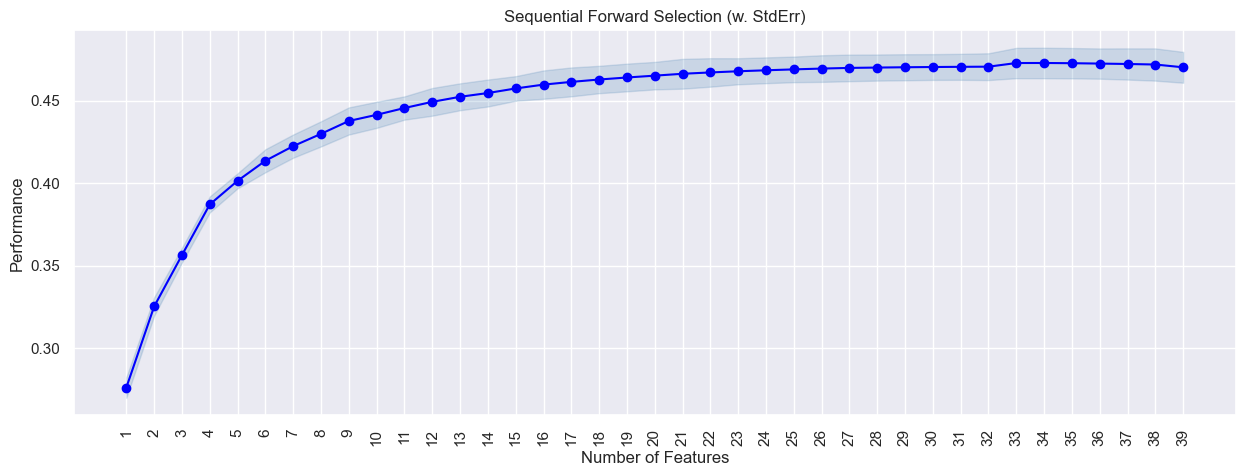

<IPython.core.display.Javascript object>

In [82]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

### Describe the results

In [83]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=3,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.0s finished

[2024-04-03 23:25:14] Features: 1/30 -- score: 0.2761414854692584[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  38 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.1s finished

[2024-04-03 23:25:14] Features: 2/30 -- score: 0.325259810280469[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  35 out of  37 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    0.1s finished

[2024-04-03 23:25:15] Features: 3/30 -- s


[2024-04-03 23:25:21] Features: 26/30 -- score: 0.46946066353766147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  13 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   8 out of  13 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2024-04-03 23:25:22] Features: 27/30 -- score: 0.4698660372445655[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2024-04-03 23:25:22] Features: 28/30 -- score: 0.4700715157882721[Parallel(n_jobs=-

<IPython.core.display.Javascript object>

In [84]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 3, 4, 5, 6, 8, 9, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 37, 38]


<IPython.core.display.Javascript object>

In [85]:
# let us look at the names of the important features
x_train.columns[feat_cols]

Index(['mediaType', 'years_running', 'studio_primary', 'studios_colab',
       'contentWarn', 'watching', 'wantWatch', 'dropped',
       'tag_Based_on_a_Manga', 'tag_Action', 'tag_Fantasy', 'tag_Sci_Fi',
       'tag_Shounen', 'tag_Original_Work', 'tag_Non_Human_Protagonists',
       'tag_Drama', 'tag_Adventure', 'tag_Family_Friendly',
       'tag_Short_Episodes', 'tag_School_Life', 'tag_Shorts',
       'tag_Slice_of_Life', 'tag_Seinen', 'tag_Supernatural',
       'tag_Animal_Protagonists', 'tag_Ecchi', 'tag_Mecha',
       'tag_Based_on_a_Light_Novel', 'tag_Others', 'tag_missing'],
      dtype='object')

<IPython.core.display.Javascript object>

**Now we will fit an sklearn model using these features only.**

In [86]:
x_train_final = x_train[x_train.columns[feat_cols]]

<IPython.core.display.Javascript object>

In [87]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [88]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                            Coefficients
mediaType                      -0.014752
years_running                   0.034134
studio_primary                  0.016250
studios_colab                   0.063044
contentWarn                    -0.168506
watching                        0.000024
wantWatch                       0.000180
dropped                        -0.000365
tag_Based_on_a_Manga            0.242479
tag_Action                      0.079957
tag_Fantasy                     0.156893
tag_Sci_Fi                      0.065136
tag_Shounen                     0.203281
tag_Original_Work               0.052467
tag_Non_Human_Protagonists      0.056692
tag_Drama                       0.298650
tag_Adventure                   0.055126
tag_Family_Friendly            -0.089121
tag_Short_Episodes             -0.412428
tag_School_Life                 0.090382
tag_Shorts                     -0.511250
tag_Slice_of_Life               0.195680
tag_Seinen                      0.157637
tag_Supernatural

<IPython.core.display.Javascript object>

In [89]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.595411,0.481699,0.480603,0.478756,19.029902


<IPython.core.display.Javascript object>

In [90]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.607225,0.491724,0.464255,0.45979,19.194252


<IPython.core.display.Javascript object>

**Results**

In training our regression model, we found that it had an average error of about 60% when predicting outcomes on the data it was trained on. This means, on average, the predictions were off by around 59% from the actual values. Similarly, the mean absolute error had an average absolute difference between predicted and actual values, was about 48%.

The R-squared value, which tells us how well the model's predictions match the actual data, was approximately 48%. This means that about 48% of the variability in the data could be explained by our model. After adjusting for the number of predictors, the adjusted R-squared value was roughly 48%.

Additionally, our model's predictions differed from the actual values by around 19% on average, as indicated by the Mean Absolute Percentage Error (MAPE).

When we tested our model on new data, we found that its performance was slightly worse. The errors were a bit higher, with an average RMSE of about 61% and an MAE of approximately 49%. The R-squared value for the test data was around 46%, suggesting that our model explained less of the variability in the new data compared to the training data. The adjusted R-squared value was approximately 46%, after adjusting for the number of predictors. Despite this, the MAPE remained similar to that of the training data, around 19%

Note: Ran data a few times to get resuls after changing some of the metrics 

In [91]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn(LR)",
    "Linear Regression sklearn (SFS features)",
]

print(" Linear Regression Training performance comparison:")
models_train_comp_df

 Linear Regression Training performance comparison:


,Linear Regression sklearn(LR),Linear Regression sklearn (SFS features)
RMSE,0.593221,0.595411
MAE,0.479823,0.481699
R-squared,0.484417,0.480603
Adj. R-squared,0.482032,0.478756
MAPE,18.935342,19.029902


<IPython.core.display.Javascript object>

In [92]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Linear RegressionTest performance comparison:")
models_test_comp_df

Linear RegressionTest performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.604215,0.607225
MAE,0.489684,0.491724
R-squared,0.469553,0.464255
Adj. R-squared,0.463792,0.459790
MAPE,19.087840,19.194252


<IPython.core.display.Javascript object>

**Comparision on Results found:**

- Training Performance:

Root Mean Squared Error (RMSE): The first model had an RMSE that was identical to the second model both being around 59%

Mean Absolute Error (MAE): The first model had an MAE that was lower by around 1 percent compared to the second model being 47% and 48% respectively.

R-squared: The first model explained a slight increase by 0.01% aginsts the second model but both of them being around 48%

Adjusted R-squared: After adjusting for the number of predictors, the first model had an adjusted R-squared that was higher than the secon model, both being 48% and 47% respectively 

Mean Absolute Percentage Error (MAPE): The first model had a MAPE that was lower than the second model by 0.1% both being 18.9% and 19% respectivley but both being relatively the same.

- Test Performance:

The first model generally performed better than the second model across all metrics on the test data, with differences ranging from approximately 3% to 4%

Overall, while the differences in performance between the two models are relatively small, the first model consistently outperformed the second model by a slight margin across all metrics for both training and test data.


# Random Forest 

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

<IPython.core.display.Javascript object>

In [94]:
# Define independent and dependent variables
X = df2.drop(["rating"], axis=1)
y = df2["rating"]

<IPython.core.display.Javascript object>

In [95]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [96]:
# Initialize the RandomForestRegressor
forest_reg_model = RandomForestRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [97]:
# Fit the model on the training data
forest_reg_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [98]:
# Predict on the training and testing data
y_train_pred = forest_reg_model.predict(x_train)
y_test_pred = forest_reg_model.predict(x_test)

# Calculate evaluation metrics
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mape = (abs(y_train - y_train_pred) / y_train).mean() * 100
test_mape = (abs(y_test - y_test_pred) / y_test).mean() * 100

# Create a DataFrame to display the results
Random_Forest_model = pd.DataFrame(
    {
        "Metric": ["RMSE", "MAE", "R-squared", "Adj. R-squared", "MAPE"],
        "RF Training": [train_rmse, train_mae, train_r2, train_r2, train_mape],
        "RF Test": [test_rmse, test_mae, test_r2, test_r2, test_mape],
    }
)

# Print the results
Random_Forest_model

,Metric,RF Training,RF Test
0,RMSE,0.164919,0.452463
1,MAE,0.126182,0.348710
2,R-squared,0.960152,0.702542
3,Adj. R-squared,0.960152,0.702542
4,MAPE,5.008490,13.786405


<IPython.core.display.Javascript object>

**Results comparison**

- Root Mean Squared Error (RMSE):

The RMSE for the training dataset is significantly lower (16.5%) compared to the test dataset (45.2%). This suggests that the model performs better in terms of predicting variability in the training data than in unseen data(test data).

- Mean Absolute Error (MAE):

Similar to RMSE, the MAE for the training dataset (12.6%) is lower than that for the test dataset (34.8%). This indicates that the average absolute difference between predicted and actual values is lower in the training data than in the test data.

- R-squared and Adjusted R-squared:

The R-squared and Adjusted R-squared values for the training dataset (96.01%) are higher compared to those for the test dataset (70.3%). This implies that the model explains a higher proportion of the variability in the training data compared to the test data.

- Mean Absolute Percentage Error (MAPE):

The MAPE for the training dataset (5.01%) is lower than that for the test dataset (13.8%). A lower MAPE indicates that the model's predictions have a smaller average percentage error in the training data compared to the test data.

- Overall, these results suggest that while the Random Forest model performs well on the training data, its performance slightly degrades when applied to unseen test data. This indicates some level of overfitting, where the model fits too closely to the training data and does not generalize well to new data. But this was by far the best model compared to the rest

# Gradient Boosting

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

<IPython.core.display.Javascript object>

In [100]:
# Define independent and dependent variables
X = df2.drop(["rating"], axis=1)
y = df2["rating"]

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


<IPython.core.display.Javascript object>

In [101]:
# Initialize the GradientBoostingRegressor
gb_reg_model = GradientBoostingRegressor(random_state=1)

# Fit the model on the training data
gb_reg_model.fit(x_train, y_train)

GradientBoostingRegressor(random_state=1)

<IPython.core.display.Javascript object>

In [102]:
# Predict on the training and testing data
y_train_pred = gb_reg_model.predict(x_train)
y_test_pred = gb_reg_model.predict(x_test)

# Calculate evaluation metrics
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mape = (abs(y_train - y_train_pred) / y_train).mean() * 100
test_mape = (abs(y_test - y_test_pred) / y_test).mean() * 100

# Create a DataFrame to display the results
Gradient_Boosting_model = pd.DataFrame(
    {
        "Metric": ["RMSE", "MAE", "R-squared", "Adj. R-squared", "MAPE"],
        "GB Training": [train_rmse, train_mae, train_r2, train_r2, train_mape],
        "GB Test": [test_rmse, test_mae, test_r2, test_r2, test_mape],
    }
)

# Print the results
Gradient_Boosting_model

,Metric,GB Training,GB Test
0,RMSE,0.445157,0.473791
1,MAE,0.348559,0.373147
2,R-squared,0.709670,0.673838
3,Adj. R-squared,0.709670,0.673838
4,MAPE,13.990830,14.865950


<IPython.core.display.Javascript object>

**Results Comparison**

- Root Mean Squared Error (RMSE):

The RMSE for the training dataset is slightly lower (44.5%) compared to the test dataset (47.4%). This indicates that the model performs slightly better in terms of predicting variability in the training data than in unseen data.

- Mean Absolute Error (MAE):

Similarly, the MAE for the training dataset (approx. 35%) is slightly lower than that for the test dataset (37.3%). This suggests that the average absolute difference between predicted and actual values is slightly lower in the training data than in the test data.

- R-squared and Adjusted R-squared:

The R-squared and Adjusted R-squared values for the training dataset (approx 71%) are slightly higher compared to those for the test dataset (67.3%). This implies that the model explains a slightly higher proportion of the variability in the training data compared to the test data.

- Mean Absolute Percentage Error (MAPE):

The MAPE for the training dataset (approx. 14%) is slightly lower than that for the test dataset (approx 15%). A lower MAPE indicates that the model's predictions have a smaller average percentage error in the training data compared to the test data.

- Overall, these results suggest that the Gradient Boosting model performs reasonably well on both the training and test data, with slightly better performance observed on the training data. The model shows good generalization to unseen data, with comparable performance on the test dataset.

## Conclusions

### Linear Regression and Linear Regressoin SFS

In [103]:
print("LR Trainig comparison")
models_train_comp_df

LR Trainig comparison


,Linear Regression sklearn(LR),Linear Regression sklearn (SFS features)
RMSE,0.593221,0.595411
MAE,0.479823,0.481699
R-squared,0.484417,0.480603
Adj. R-squared,0.482032,0.478756
MAPE,18.935342,19.029902


<IPython.core.display.Javascript object>

In [104]:
print("LR Test comparison")
models_test_comp_df

LR Test comparison


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.604215,0.607225
MAE,0.489684,0.491724
R-squared,0.469553,0.464255
Adj. R-squared,0.463792,0.459790
MAPE,19.087840,19.194252


<IPython.core.display.Javascript object>

### Random Forest

In [105]:
Random_Forest_model

,Metric,RF Training,RF Test
0,RMSE,0.164919,0.452463
1,MAE,0.126182,0.348710
2,R-squared,0.960152,0.702542
3,Adj. R-squared,0.960152,0.702542
4,MAPE,5.008490,13.786405


<IPython.core.display.Javascript object>

### Gradient Boosting 

In [106]:
Gradient_Boosting_model

,Metric,GB Training,GB Test
0,RMSE,0.445157,0.473791
1,MAE,0.348559,0.373147
2,R-squared,0.709670,0.673838
3,Adj. R-squared,0.709670,0.673838
4,MAPE,13.990830,14.865950


<IPython.core.display.Javascript object>


- Among the models evaluated,Gradient boosting performs the best and then Random Forest performs the second best on the test data, achieving the highest R-squared and Adjusted R-squared values despite potential overfitting. the testing data had a 96% goodness of fit making it very much a risk of overfitting, but has a good result in test data with it coming around 70%

- Linear Regression, both with and without Sequential Feature Selection, performs similarly and provides more stable and interpretable results compared to the ensemble methods. The only variation is close to 2-3%

- Gradient Boosting achieves competitive performance overall based on the output when compared and observed against Random Forest.

- The worst-performing model in terms of generalization to unseen data is Random Forest, as indicated by the significant increase in RMSE and MAE values on the test data. 

- the worst performing in terms of goodness of fit(R-squared and adjusted R squared) is the Linear Regression model as it had the lowest of them all. 

- the worst performing overall is the Linear Regression model.